# Drunk Face Detection with CNN

### Image Handling

#### Image Importing

In [1]:
#Importing libraries
import numpy as np
from PIL import Image
import os
import glob
import matplotlib as plt
import pickle
from imgaug import augmenters as iaa
from matplotlib import pyplot
import tensorflow as tf
from sklearn.utils import shuffle

In [2]:
#Function for importing images
def read_images(file_paths):
    X = []
    y = [] # 0 if sober, 1 if drunk
    
    for file_name in file_paths:
        thermal_data = np.zeros((128, 160))
        with Image.open(file_name) as img:
            for i in range(img.n_frames):
                img.seek(i)
                frame_data = np.array(img)
                min_val = np.amin(frame_data)
                frame_data -= min_val
                for j in range(img.height):
                    for k in range(img.width):
                        thermal_data[j, k] += frame_data[j, k]
        X.append(thermal_data)
        
        if '_1_f' in file_name: # Only first pic in series is sober data
            y.append(0)
        else:
            y.append(1)

        print(file_name)
        print(thermal_data)
    return X,y

In [3]:
#Locating the images
DIR_NAME = 'data'

os.chdir(f'../{DIR_NAME}')
DATA_DIR = os.getcwd()

In [4]:
#Preparing training pickle file
os.chdir(os.path.join(DATA_DIR,'train'))
HOME = os.getcwd()

X_train = None
y_train = None
if os.path.exists('train.pkl'):
    (X_train,y_train) = pickle.load(open('train.pkl', 'rb'))

else:
    # Full filepaths
    file_paths = []
    subjects = glob.glob('*')
    for subject in subjects:
        for i in range(1,5):
            facial_pics = glob.glob(f'{subject}/*{i}_f*') # Look for only face pictures, labeled 1-4
            for partial_path in facial_pics:
                file_paths.append(os.path.join(HOME,partial_path))
            if not facial_pics:
                print(f'{subject}/{i}_f file not found')

    X_train,y_train = read_images(file_paths)
    pickle.dump((X_train,y_train), open('train.pkl', 'wb'))

20_nefeli/4_f file not found
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\01_petros\01_petros_1_f_M_20_71.tif
[[1979. 1852. 1708. ... 2418. 2436. 2017.]
 [1836. 1882. 1928. ... 2651. 2636. 2185.]
 [1713. 2019. 2028. ... 2715. 2420. 2142.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\01_petros\01_petros_2_f_M_20_71_033.tif
[[ 463.  495.  287. ... 2069. 2056. 1657.]
 [ 368.  476.  673. ... 2129. 2138. 1850.]
 [ 258.  568.  658. ... 2247. 2057. 1838.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\01_petros\01_petros_3_f_M_20_71_032.tif
[[1413. 1319. 1215. ... 2015. 1872. 1687.]
 [1433. 1333. 1437. ... 2129. 2098. 1721.]
 [1330. 1546. 1555.

C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\10_konst\10_konst_3_f_F_35_54_055.tif
[[2040. 1803. 1888. ... 2624. 2529. 2393.]
 [1907. 1887. 2001. ... 2705. 2576. 2471.]
 [1853. 2016. 2197. ... 2650. 2563. 2448.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\10_konst\10_konst_4_f_F_35_54.tif
[[1963. 1707. 1846. ... 2577. 2561. 2302.]
 [1803. 1897. 1937. ... 2721. 2646. 2482.]
 [1784. 1916. 2063. ... 2619. 2587. 2425.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\11_takis\11_takis_1_f_M_20_79.tif
[[ 712.  735.  550. ...  697.  615.  511.]
 [ 705.  699.  598. ...  924.  827.  550.]
 [ 619.  711.  639. ... 1103.  945.  695.]
 ...
 [ 338.  4

C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\18_dionisis\18_dionisis_1_f_M_18_80.tif
[[1133. 1098. 1095. ... 1334. 1214. 1284.]
 [1083. 1306. 1283. ... 1400. 1377. 1406.]
 [ 968. 1187. 1115. ... 1667. 1388. 1389.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\18_dionisis\18_dionisis_2_f_M_18_80.tif
[[ 673.  526.  524. ... 1401. 1304. 1346.]
 [ 567.  705.  732. ... 1491. 1462. 1535.]
 [ 490.  592.  552. ... 1811. 1472. 1471.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\18_dionisis\18_dionisis_3_f_M_18_80.tif
[[1169. 1030. 1004. ... 1289. 1236. 1245.]
 [1076. 1235. 1264. ... 1450. 1339. 1364.]
 [ 996. 1122. 1038. ... 1706. 1442. 1372.]
 

C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\26_tsag\26_tsag_4_f_M_38_88.tif
[[1918. 1751. 1873. ...  910.  939.  670.]
 [1772. 1888. 2222. ... 1109. 1091.  625.]
 [1766. 2005. 2157. ... 1079.  992.  990.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\28_frag\28_frag_1_f_M_40_83.tif
[[0.000e+00 0.000e+00 0.000e+00 ... 7.360e+02 5.380e+02 6.250e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 8.510e+02 8.020e+02 7.660e+02]
 [0.000e+00 0.000e+00 1.000e+00 ... 1.021e+03 9.060e+02 7.140e+02]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\28_frag\28_frag_2_f_M_40_83.tif
[[1697. 15

C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\37_vassilisA\37_vassilisA_3_f_M_54_90.tif
[[810. 684. 630. ... 603. 499. 640.]
 [740. 862. 803. ... 710. 645. 462.]
 [587. 838. 778. ... 675. 495. 561.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\37_vassilisA\37_vassilisA_4_f_M_54_90.tif
[[450. 609. 649. ... 559. 420. 562.]
 [608. 734. 721. ... 691. 424. 415.]
 [535. 846. 717. ... 456. 300. 558.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\train\38_christos\38_christos_1_f_M_33_76.tif
[[  0.   0.   1. ... 567. 370. 534.]
 [  1.   1.  36. ... 555. 414. 406.]
 [  0.   0.   6. ... 563. 457. 351.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.  

In [5]:
#Preparing testing pickle file
os.chdir(os.path.join(DATA_DIR,'test'))
HOME = os.getcwd()

X_test = None
y_test = None
if os.path.exists('test.pkl'):
    (X_test,y_test) = pickle.load(open('test.pkl', 'rb'))

else:
    # Full filepaths
    file_paths = []
    subjects = glob.glob('*')
    for subject in subjects:
        for i in range(1,5):
            facial_pics = glob.glob(f'{subject}/*{i}_f*') # Look for only face pictures, labeled 1-4
            for partial_path in facial_pics:
                file_paths.append(os.path.join(HOME,partial_path))
            if not facial_pics:
                print(f'{subject}/{i}_f file not found')

    X_test,y_test = read_images(file_paths)
    pickle.dump((X_test,y_test), open('test.pkl', 'wb'))

09_giorg/1_f file not found
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\test\06_tris\06_tris_1_f_F_24_51.tif
[[1678. 1531. 1396. ... 2236. 2228. 1853.]
 [1475. 1522. 1700. ... 2324. 2353. 2029.]
 [1365. 1692. 1768. ... 2410. 2130. 2012.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\test\06_tris\06_tris_2_f_F_24_51_057.tif
[[1378. 1250. 1114. ... 2685. 2677. 2419.]
 [1183. 1294. 1415. ... 2811. 2826. 2540.]
 [1093. 1342. 1359. ... 2873. 2716. 2554.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\test\06_tris\06_tris_3_f_F_24_51.tif
[[1660. 1584. 1638. ... 2232. 2112. 1973.]
 [1580. 1618. 1722. ... 2444. 2326. 1948.]
 [1548. 1790. 1893. ... 2433. 2266. 200

C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\test\23_vassiliskar\23_vassiliskar_4_f_M_26_78.tif
[[1558. 1313. 1283. ... 1218. 1390. 1197.]
 [1280. 1416. 1496. ... 1522. 1521. 1208.]
 [1303. 1520. 1611. ... 1678. 1592. 1164.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\test\24_rig\24_rig_1_f_M_31_72.tif
[[1974. 1996. 1853. ... 1549. 1412. 1497.]
 [1876. 2090. 2267. ... 1793. 1639. 1410.]
 [1873. 2051. 1989. ... 1795. 1585. 1466.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\test\24_rig\24_rig_2_f_M_31_72.tif
[[2668. 2477. 2416. ... 2049. 2090. 2024.]
 [2430. 2550. 2647. ... 2339. 2371. 2035.]
 [2497. 2612. 2716. ... 2506. 2369. 1940.]
 ...
 [   0.    0.

In [6]:
#Preparing validating pickle file
os.chdir(os.path.join(DATA_DIR,'validation'))
HOME = os.getcwd()

X_val = None
y_val = None
if os.path.exists('validation.pkl'):
    (X_val,y_val) = pickle.load(open('validation.pkl', 'rb'))

else:
    # Full filepaths
    file_paths = []
    subjects = glob.glob('*')
    for subject in subjects:
        for i in range(1,5):
            facial_pics = glob.glob(f'{subject}/*{i}_f*') # Look for only face pictures, labeled 1-4
            for partial_path in facial_pics:
                file_paths.append(os.path.join(HOME,partial_path))
            if not facial_pics:
                print(f'{subject}/{i}_f file not found')

    X_val,y_val = read_images(file_paths)
    pickle.dump((X_val,y_val), open('validation.pkl', 'wb'))

C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\validation\02_giorgos\02_giorgos_1_f_M_30_83.tif
[[1251. 1108.  911. ... 2046. 2108. 1779.]
 [1022. 1140. 1173. ... 2183. 2274. 1862.]
 [ 943. 1203. 1248. ... 2273. 2058. 1874.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\validation\02_giorgos\02_giorgos_2_f_M_30_83_032.tif
[[1.000e+01 1.300e+01 1.000e+00 ... 1.766e+03 1.693e+03 1.350e+03]
 [0.000e+00 3.300e+01 1.510e+02 ... 1.829e+03 1.844e+03 1.540e+03]
 [0.000e+00 5.600e+01 1.310e+02 ... 1.954e+03 1.682e+03 1.519e+03]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\validation\02_giorgos\

C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\validation\41_kalp\41_kalp_2_f_M_62_95.tif
[[492. 518. 612. ... 407. 368. 375.]
 [458. 567. 694. ... 614. 392. 331.]
 [596. 685. 731. ... 611. 419. 429.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\validation\41_kalp\41_kalp_3_f_M_62_95.tif
[[215. 184. 373. ... 106. 223. 167.]
 [230. 291. 361. ... 212. 172. 151.]
 [225. 316. 476. ... 177. 148. 294.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
C:\Users\Kathakoli\Documents\vitmat\drunk-detection-CNN-master\data\validation\41_kalp\41_kalp_4_f_M_62_95.tif
[[ 798.  904.  764. ...  613.  560.  512.]
 [ 895. 1135. 1047. ...  591.  618.  354.]
 [ 792. 1016.  928. ...  546.  416.  499.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0

#### Image Manipulation

In [7]:
#Augmenting Images
flip_seq = iaa.Sequential([
    iaa.Fliplr(1), # horizontally flip all of the images
])

# Add flipped images to train and val sets
X_train_flipped = flip_seq(images=X_train)
X_train = np.concatenate((X_train, X_train_flipped), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)

X_val_flipped = flip_seq(images=X_val)
X_val = np.concatenate((X_val, X_val_flipped), axis=0)
y_val = np.concatenate((y_val, y_val), axis=0)

X_test_flipped = flip_seq(images=X_test)
X_test = np.concatenate((X_test, X_test_flipped), axis=0)
y_test = np.concatenate((y_test, y_test), axis=0)


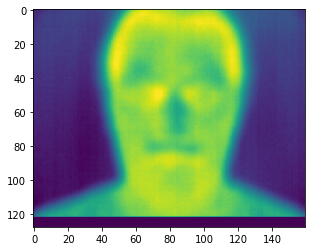

In [8]:
pyplot.imshow(X_train[7])

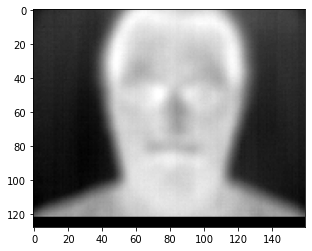

In [9]:
pyplot.imshow(X_train[7], cmap='gray')

In [10]:
#Normalizing the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)

print(X_train)

[[[0.07656587 0.06818528 0.06271894 ... 0.07753238 0.07883577 0.06937728]
  [0.07103331 0.06928979 0.0707975  ... 0.08500345 0.08530833 0.07515585]
  [0.06627455 0.07433373 0.07446957 ... 0.08705559 0.07831797 0.07367681]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.03470824 0.03348328 0.01865076 ... 0.06448574 0.06448941 0.05404974]
  [0.02758668 0.03219806 0.04373505 ... 0.0663558  0.06706146 0.06034522]
  [0.01934066 0.03842122 0.04276027 ... 0.07003358 0.06452077 0.05995379]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.09233705 0.08471026 0.07801357 ... 0.07829648 0.07450699 0.06874748]
  [0.09364401 0.085609

In [11]:
# Shuffle X_train and y_train together
def shuffle_data(X, y):
    X_s, y_s = shuffle(X, y, random_state=42)
    return X_s, y_s

x,y = X_train.shape[1:]
# Get shuffled data and prepare for model.fit inputs
X_train_s, y_train_s = shuffle_data(X_train, y_train)
X_val_s, y_val_s = shuffle_data(X_val, y_val)
X_test_s, y_test_s = shuffle_data(X_test, y_test)
input_data = X_train_s.reshape((-1, x, y, 1))
val_data = X_val_s.reshape((-1, x, y, 1))
test_data = X_test_s.reshape((-1, x, y, 1))

In [12]:
X_train.shape[1:]

(128, 160)

### Model Definition

In [13]:
#Importing libraries for model defination
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import tensorflow.keras.metrics

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import tensorflow.keras.metrics


from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

import itertools
import copy

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import tensorflow.keras.metrics

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt


3/3 [==============================] - 0s 25ms/step - loss: 0.6915 - accuracy: 0.7857


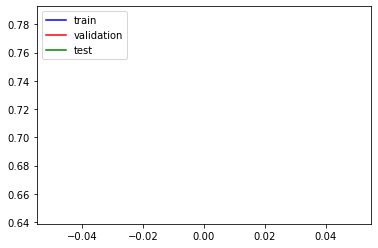

epoch 0, loss 0.692022, number 0
3/3 [==============================] - 0s 27ms/step - loss: 0.6903 - accuracy: 0.7571


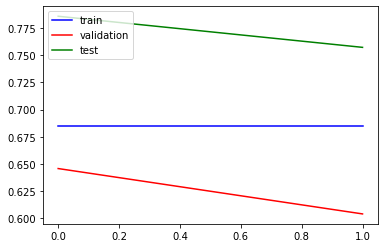

epoch 1, loss 0.691237, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6879 - accuracy: 0.7714


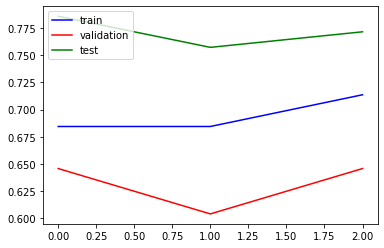

epoch 2, loss 0.689482, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6870 - accuracy: 0.7571


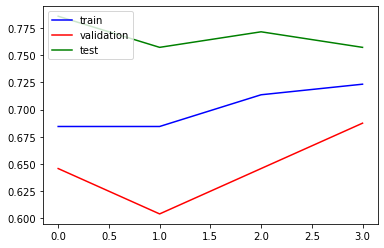

epoch 3, loss 0.688784, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6872 - accuracy: 0.7286


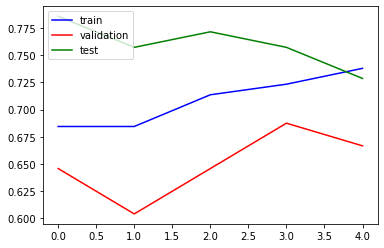

epoch 4, loss 0.688131, number 0
3/3 [==============================] - 0s 30ms/step - loss: 0.6875 - accuracy: 0.7143


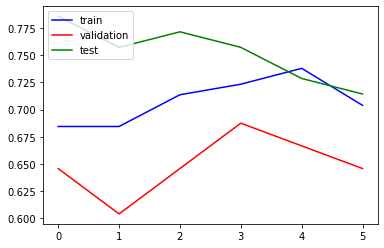

epoch 5, loss 0.688131, number 1
3/3 [==============================] - 0s 30ms/step - loss: 0.6864 - accuracy: 0.7143


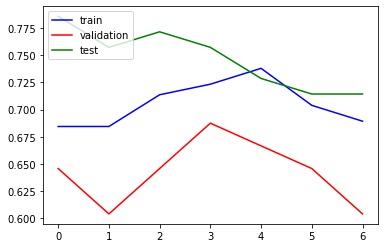

epoch 6, loss 0.688131, number 2
3/3 [==============================] - 0s 30ms/step - loss: 0.6856 - accuracy: 0.7286


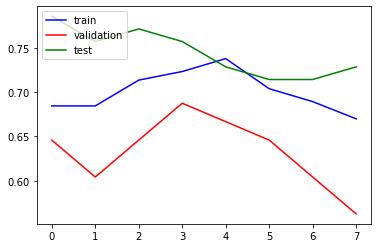

epoch 7, loss 0.688131, number 3
3/3 [==============================] - 0s 29ms/step - loss: 0.6814 - accuracy: 0.7714


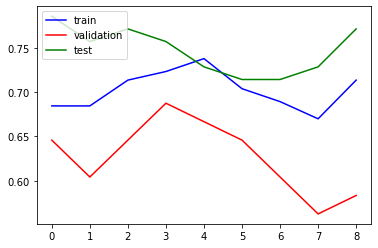

epoch 8, loss 0.687384, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6794 - accuracy: 0.7429


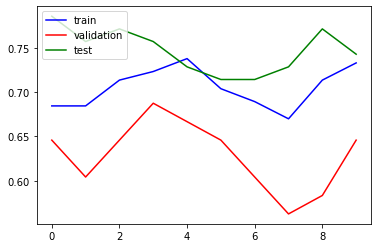

epoch 9, loss 0.684310, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6783 - accuracy: 0.7571


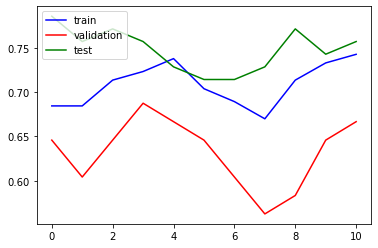

epoch 10, loss 0.683986, number 0
3/3 [==============================] - 0s 30ms/step - loss: 0.6756 - accuracy: 0.7714


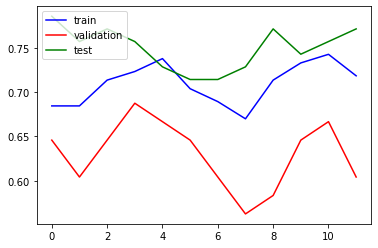

epoch 11, loss 0.683986, number 1
3/3 [==============================] - 0s 25ms/step - loss: 0.6754 - accuracy: 0.7429


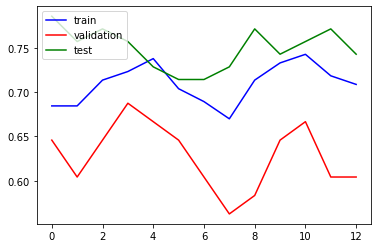

epoch 12, loss 0.683986, number 2
3/3 [==============================] - 0s 30ms/step - loss: 0.6676 - accuracy: 0.7714


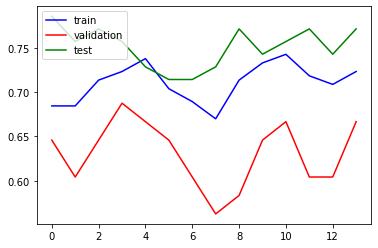

epoch 13, loss 0.677184, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6748 - accuracy: 0.7714


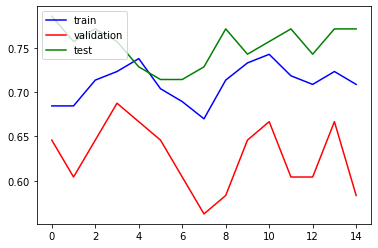

epoch 14, loss 0.677184, number 1
3/3 [==============================] - 0s 25ms/step - loss: 0.6682 - accuracy: 0.7857


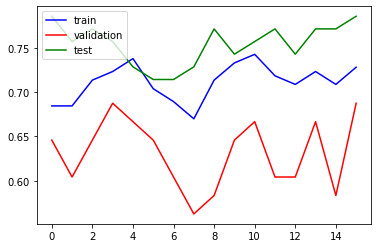

epoch 15, loss 0.675932, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6661 - accuracy: 0.7857


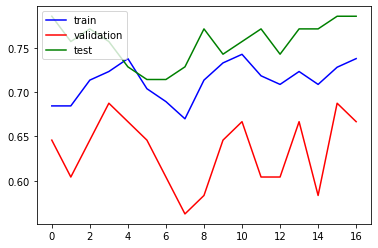

epoch 16, loss 0.675932, number 1
3/3 [==============================] - 0s 25ms/step - loss: 0.6658 - accuracy: 0.7857


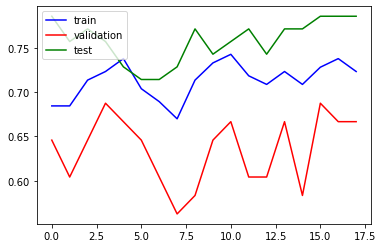

epoch 17, loss 0.675050, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6617 - accuracy: 0.7714


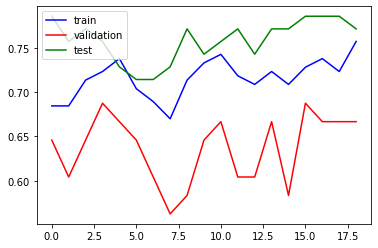

epoch 18, loss 0.672585, number 0
3/3 [==============================] - 0s 28ms/step - loss: 0.6564 - accuracy: 0.7714


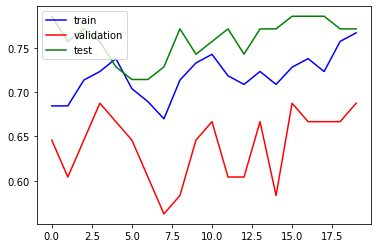

epoch 19, loss 0.667021, number 0
3/3 [==============================] - 0s 35ms/step - loss: 0.6604 - accuracy: 0.8000


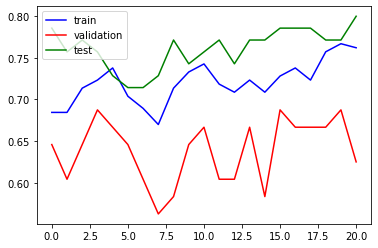

epoch 20, loss 0.667021, number 1
3/3 [==============================] - 0s 30ms/step - loss: 0.6593 - accuracy: 0.7714


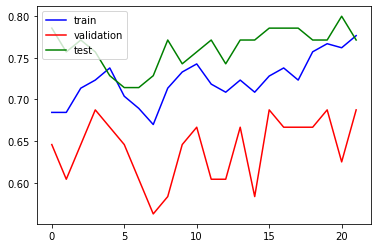

epoch 21, loss 0.667021, number 2
1/3 [=========>....................] - ETA: 0s - loss: 0.6701 - accuracy: 0.6875

KeyboardInterrupt: 

In [14]:
# Single CNN run
x,y = X_train.shape[1:]
# Get shuffled data and prepare for model.fit inputs
X_train_s, y_train_s = shuffle_data(X_train, y_train)
X_val_s, y_val_s = shuffle_data(X_val, y_val)
X_test_s, y_test_s = shuffle_data(X_test, y_test)
input_data = X_train_s.reshape((-1, x, y, 1))
val_data = X_val_s.reshape((-1, x, y, 1))
test_data = X_test_s.reshape((-1, x, y, 1))

## Model
model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape=(x,y,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.add(Activation('sigmoid'))

METRICS = [
      tensorflow.keras.metrics.TruePositives(name='tp'),
      tensorflow.keras.metrics.FalsePositives(name='fp'),
      tensorflow.keras.metrics.TrueNegatives(name='tn'),
      tensorflow.keras.metrics.FalseNegatives(name='fn'), 
      tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'),
      tensorflow.keras.metrics.Precision(name='precision'),
      tensorflow.keras.metrics.Recall(name='recall'),
      tensorflow.keras.metrics.AUC(name='auc'),
      tensorflow.keras.metrics.BinaryCrossentropy(name='bce')
]

learning_rate = 0.00001
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

class_weight = {0: (1/4)/2, 1: (3/4)/2}

# how many epochs (passes through the data)
num_epochs = 1000

# this will hold the performance
perf_time = np.zeros((num_epochs, 4))

# set up figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

best_val = [np.inf, 0]
for epoch in np.arange(0,num_epochs):
    model.fit(input_data, np.array(y_train_s), 
              batch_size=2, 
              epochs=1, 
              verbose=1, 
              class_weight=class_weight,
              validation_data=(val_data,np.array(y_val_s)),
              shuffle=True,
              use_multiprocessing=True)    
    val = model.evaluate(val_data, np.array(y_val_s))    
    new = [model.evaluate(input_data, np.array(y_train_s))[1],val[0], val[1],model.evaluate(test_data, np.array(y_test_s))[1]]    
    
    # add to performance
    perf_time[epoch,:]=new
    
    # visualize
    plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,0],'b', label='train')
    plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,2],'r', label='validation')
    plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,3],'g', label='test')
    plt.legend(loc='upper left')
    plt.show()
    
    if val[0] >= best_val[0]:
        best_val[1] += 1
    else:
        best_val = [val[0], 0]
    print ("epoch %d, loss %f, number %d" %(epoch, best_val[0], best_val[1]))
        
    # if there hasn't been an improvement in three epochs, stop training
    if best_val[1] > 30:
        break

3/3 [==============================] - 0s 25ms/step - loss: 0.6368 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 0, loss 0.641805, number 0
3/3 [==============================] - 0s 20ms/step - loss: 0.5900 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 1, loss 0.600526, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.5581 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 2, loss 0.574222, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.5415 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 3, loss 0.563110, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.5365 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 4, loss 0.563110, number 1
3/3 [==============================] - 0s 24ms/step - loss: 0.5407 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 5, loss 0.563110, number 2
3/3 [==============================] - 0s 25ms/step - loss: 0.5730 - accuracy: 0.7714
hy

3/3 [==============================] - 0s 30ms/step - loss: 0.6035 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 18, loss 0.563081, number 11
3/3 [==============================] - 0s 30ms/step - loss: 0.6031 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 19, loss 0.563081, number 12
3/3 [==============================] - 0s 30ms/step - loss: 0.6054 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 20, loss 0.563081, number 13
3/3 [==============================] - 0s 30ms/step - loss: 0.6059 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 21, loss 0.563081, number 14
3/3 [==============================] - 0s 30ms/step - loss: 0.6053 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 22, loss 0.563081, number 15
3/3 [==============================] - 0s 30ms/step - loss: 0.6045 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 23, loss 0.563081, number 16
3/3 [==============================] - 0s 30ms/step - loss: 0.6060 - accurac

3/3 [==============================] - 0s 30ms/step - loss: 0.6052 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 36, loss 0.563081, number 29
3/3 [==============================] - 0s 35ms/step - loss: 0.6062 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 37, loss 0.563081, number 30
3/3 [==============================] - 0s 30ms/step - loss: 0.6063 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 2), epoch 38, loss 0.563081, number 31
3/3 [==============================] - 0s 25ms/step - loss: 0.6761 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 8), epoch 0, loss 0.677415, number 0
3/3 [==============================] - 0s 29ms/step - loss: 0.6590 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 8), epoch 1, loss 0.661918, number 0
3/3 [==============================] - 0s 25ms/step - loss: 0.6434 - accuracy: 0.7714
hyperparameters (2, 2, 2, 2, 8), epoch 2, loss 0.648151, number 0
3/3 [==============================] - 0s 30ms/step - loss: 0.6281 - accuracy: 0.7

KeyboardInterrupt: 

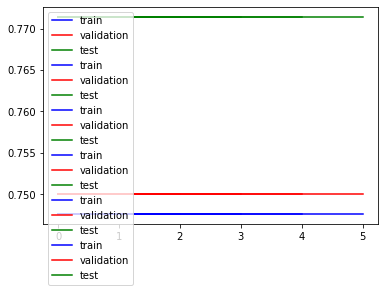

In [16]:
# Hyperparameter tuning for CNN where hyperparameters are layer sizes and batch size

np.random.seed(42)

saved_acc = []
#saved_acc = pickle.load(open('saved_acc.pkl', 'rb'))

# hyperparameters
layer1_size = [2,8,32,128]
layer2_size = [2,8,32,128]
layer3_size = [2,8,32,128]
layer4_size = [2,8,32,128]
batch_size = [2,8,32,128]

# creates a list of all combinations of hyperparameters
param_grid = list(itertools.product(layer1_size, layer2_size, layer3_size, layer4_size, batch_size))

offset = len(saved_acc)
for i, params in enumerate(param_grid[offset:]):
    i = i + offset
    model = Sequential()

    model.add(Conv2D(params[0], (3, 3), input_shape=(x,y,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(params[1], (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(params[2], (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

    model.add(Dense(params[3], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1))

    model.add(Activation('sigmoid'))

    METRICS = [
          tensorflow.keras.metrics.TruePositives(name='tp'),
          tensorflow.keras.metrics.FalsePositives(name='fp'),
          tensorflow.keras.metrics.TrueNegatives(name='tn'),
          tensorflow.keras.metrics.FalseNegatives(name='fn'), 
          tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'),
          tensorflow.keras.metrics.Precision(name='precision'),
          tensorflow.keras.metrics.Recall(name='recall'),
          tensorflow.keras.metrics.AUC(name='auc'),
          tensorflow.keras.metrics.BinaryCrossentropy(name='bce')
    ]

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    class_weight = {0: (1/4)/2, 1: (3/4)/2}

    # number of epochs
    num_epochs = 1000

    # this will hold the performance
    perf_time = np.zeros((num_epochs, 4))

    # set up figure
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    
    best_val = [np.inf, 0]
    for epoch in np.arange(0,num_epochs):
        model.fit(input_data, np.array(y_train_s), 
                  batch_size=params[4], 
                  epochs=1, 
                  verbose=1, 
                  class_weight=class_weight,
                  validation_data=(val_data,np.array(y_val_s)),
                  shuffle=True,
                  use_multiprocessing=True)    
        # check the performance on train/test/val
        # the model.evaluate function returns the loss (position 0) and the performance (position 1)
        val = model.evaluate(val_data, np.array(y_val_s))  # val = [val_loss, val_accuracy]  
        new = [model.evaluate(input_data, np.array(y_train_s))[1],            
               val[0], val[1],            
               model.evaluate(test_data, np.array(y_test_s))[1]]    

        # add to performance
        perf_time[epoch,:]=new

        # visualize
        plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,0],'b', label='train')
        plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,2],'r', label='validation')
        plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,3],'g', label='test')
        plt.legend(loc='upper left')
        

        # is validation performance better?
        if val[0] >= best_val[0]:
            best_val[1] += 1
        else:
            best_val = [val[0], 0]
        print (f'hyperparameters {str(params)}, ' + "epoch %d, loss %f, number %d" %(epoch, best_val[0], best_val[1]))

        # if there hasn't been an improvement in three epochs, stop training
        if best_val[1] > 30:
            break
            
    test_accuracy = new[3]
    
    # set up figure
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    plt.title(f'Hyperparameters: {str(params)}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,0],'b', label='train')
    plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,2],'r', label='validation')
    plt.plot(np.arange(0,epoch+1),perf_time[0:epoch+1,3],'g', label='test')
    plt.legend(loc='upper left')
    
    plt.savefig(f'run-{i}-{str(params)}-test_acc={test_accuracy}.png')
    
    plt.close('all') # close fig to save memory
    
    
    # save current model and val score
    save_model(model, f'run-{i}.hdf5')
    saved_acc.append(copy.deepcopy(test_accuracy))
    pickle.dump(saved_acc, open('saved_acc.pkl', 'wb'))

In [17]:
best_index = np.argmax(saved_acc)

# best model found
model = load_model(f'run-{best_index}.hdf5')

print(f'Best hyperparameters:\t{param_grid[best_index]}')

Best hyperparameters:	(2, 2, 2, 2, 2)


In [18]:
#Saving the best model

x,y = X_train.shape[1:]
# Get shuffled data and prepare for model.fit inputs
X_train_s, y_train_s = shuffle_data(X_train, y_train)
X_val_s, y_val_s = shuffle_data(X_val, y_val)
X_test_s, y_test_s = shuffle_data(X_test, y_test)
input_data = X_train_s.reshape((-1, x, y, 1))
val_data = X_val_s.reshape((-1, x, y, 1))
test_data = X_test_s.reshape((-1, x, y, 1))

model = Sequential()

model.add(Conv2D(8, (3, 3), input_shape=(x,y,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.add(Activation('sigmoid'))

METRICS = [
      tensorflow.keras.metrics.TruePositives(name='tp'),
      tensorflow.keras.metrics.FalsePositives(name='fp'),
      tensorflow.keras.metrics.TrueNegatives(name='tn'),
      tensorflow.keras.metrics.FalseNegatives(name='fn'), 
      tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'),
      tensorflow.keras.metrics.Precision(name='precision'),
      tensorflow.keras.metrics.Recall(name='recall'),
      tensorflow.keras.metrics.AUC(name='auc'),
      tensorflow.keras.metrics.BinaryCrossentropy(name='bce')
]

model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

class_weight = {0: (1/4)/2, 1: (3/4)/2}


save_best_model_loss = tf.keras.callbacks.ModelCheckpoint("best_loss2.epoch={epoch:02d}-val_loss={val_loss:.4f}.hdf5", 
                                                          monitor='val_loss', 
                                                          verbose=0, save_best_only=True, 
                                                          save_weights_only=False, 
                                                          mode='min', save_freq='epoch')
save_best_model_acc = tf.keras.callbacks.ModelCheckpoint("best_acc2.epoch={epoch:02d}-val_acc={val_accuracy:.4f}.hdf5", 
                                                         monitor='val_accuracy', 
                                                         verbose=0, save_best_only=True, 
                                                         save_weights_only=False, 
                                                         mode='max', save_freq='epoch')

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=60,
    mode='max',
    restore_best_weights=False)

history = model.fit(input_data, np.array(y_train_s), 
          batch_size=128, 
          epochs=1000, 
          validation_data=(val_data,np.array(y_val_s)), 
          class_weight=class_weight,
          callbacks=[early_stopping,save_best_model_loss,save_best_model_acc],#,save_best_model_tn,save_best_model_auc,save_best_model_bce],
          shuffle=True,
          use_multiprocessing=True)


# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'],'--')
plt.title('Loss history (solid=val, solid=train)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'],'--')
plt.title('Accuracy history (solid=val, solid=train)')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

Epoch 1/1000
2/2 [==============================] - 2s 639ms/step - loss: 0.2168 - accuracy: 0.4260 - val_loss: 0.6776 - val_accuracy: 0.7500
Epoch 2/1000
2/2 [==============================] - 1s 545ms/step - loss: 0.2064 - accuracy: 0.5661 - val_loss: 0.6669 - val_accuracy: 0.7500
Epoch 3/1000
2/2 [==============================] - 1s 592ms/step - loss: 0.1945 - accuracy: 0.6972 - val_loss: 0.6550 - val_accuracy: 0.7500
Epoch 4/1000
2/2 [==============================] - 1s 594ms/step - loss: 0.1843 - accuracy: 0.7114 - val_loss: 0.6460 - val_accuracy: 0.7500
Epoch 5/1000
2/2 [==============================] - 1s 571ms/step - loss: 0.1782 - accuracy: 0.7665 - val_loss: 0.6359 - val_accuracy: 0.7500
Epoch 6/1000
2/2 [==============================] - 1s 590ms/step - loss: 0.1698 - accuracy: 0.7983 - val_loss: 0.6320 - val_accuracy: 0.7500
Epoch 7/1000
2/2 [==============================] - 1s 600ms/step - loss: 0.1638 - accuracy: 0.7873 - val_loss: 0.6319 - val_accuracy: 0.7500
Epoch 

KeyboardInterrupt: 

### Testing the model

In [17]:
#Importing libraries for testing
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import load_model
#from statsmodels.stats.anova import AnovaRM
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import tensorflow.keras.metrics
import seaborn as sns

In [18]:
# Determine if best model found's predictions are statistically significant vs guessing all drunk (77.14% accuracy)

# best model found
model = load_model(f'C:/Users/Kathakoli/Documents/vitmat/drunk-detection-CNN-master/models/3conv-2,2,32-1dense-8-test_acc=8428571224212646.hdf5')


X_test_s, y_test_s = shuffle_data(X_test, y_test)
test_data = X_test_s.reshape((-1, x, y, 1))
model.evaluate(test_data, np.array(y_test_s))

y_pred = model.predict_classes(test_data)

subject = []
correct = []
model_name = []

for i, (true, pred) in enumerate(zip(y_test_s, y_pred)):
    subject.append(i)
    correct.append(int(true==pred))
    model_name.append('best')

# initialize y_pred where all predictions are drunk
y_pred_drunk = []
for _ in range(len(y_test_s)):
    y_pred_drunk.append(1) # TODO change this to whatever represents drunk
for i, (true, pred) in enumerate(zip(y_test_s, y_pred_drunk)):
    subject.append(i)
    correct.append(int(true==pred))
    model_name.append('all drunk')
    

3/3 [==============================] - 0s 25ms/step - loss: 0.4024 - accuracy: 0.8429


C:\Users\Kathakoli\anaconda3\envs\env_dlib\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3/3 [==============================] - 0s 25ms/step - loss: 0.4024 - accuracy: 0.8429
Accuracy: 0.8428571428571429
Confusion Matrix:
[[ 8  8]
 [ 3 51]]


<AxesSubplot:>

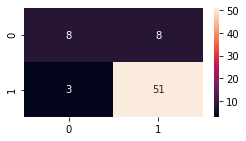

In [19]:
X_test_s, y_test_s = shuffle_data(X_test, y_test)
test_data = X_test_s.reshape((-1, x, y, 1))
model.evaluate(test_data, np.array(y_test_s))

y_pred = model.predict_classes(test_data)

print(f'Accuracy: {accuracy_score(y_test_s,y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_s,y_pred)}')

plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test_s,y_pred),annot=True)


Actual: 1, Pred: [1]
Actual: 0, Pred: [1]
Actual: 1, Pred: [1]
Actual: 1, Pred: [1]
Actual: 0, Pred: [0]


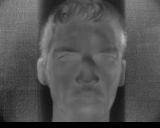

Next Correctly detected sober individual:
Actual: 1, Pred: [1]
Actual: 1, Pred: [0]
Actual: 1, Pred: [1]
Actual: 1, Pred: [1]
Actual: 1, Pred: [1]
Actual: 0, Pred: [1]
Actual: 1, Pred: [0]
Actual: 1, Pred: [1]
Actual: 1, Pred: [1]
Actual: 0, Pred: [1]
Actual: 1, Pred: [1]
Actual: 0, Pred: [0]


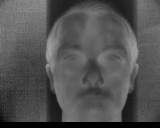

Next Correctly detected sober individual:
Actual: 0, Pred: [1]
Actual: 1, Pred: [1]
Actual: 1, Pred: [1]
Actual: 1, Pred: [1]
Actual: 1, Pred: [1]
Actual: 0, Pred: [0]


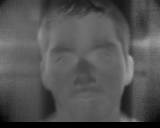

KeyboardInterrupt: Interrupted by user

In [21]:
for i,(actual,pred) in enumerate(zip(y_test_s,y_pred)):
    print(f'Actual: {actual}, Pred: {pred}')
    
    if actual==0 and actual==pred:
        display(Image.fromarray(X_test_s[i]*1000).convert('L'))
        input('Next Correctly detected sober individual:')